In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import sys

np.set_printoptions(precision=3, suppress=True)
# устанавливаем точность 3 для numpy

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

import copy

from sklearn import preprocessing
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest


from flask import Flask, request, render_template

2.9.1


# Знакомство и проверка dataset

In [65]:
raw_dataset = pd.read_excel('/Users/apple/Downloads/Data Science/Итоговый проект/hw_data_composite/X_nup_bp.xlsx')
# raw_dataset оригинал dataset

In [66]:
df = copy.copy(raw_dataset) #  копия оригинального dataset
df.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,4.0,57.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,0,4.0,60.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,0,4.0,70.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,0,5.0,47.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,0,5.0,57.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [67]:
df.info()
#проверка на пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1040 non-null   int64  
 1   Шаг нашивки                           1040 non-null   float64
 2   Плотность нашивки                     1040 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность при рас

In [68]:
df.duplicated().sum()
#проверка на дубликаты

0

In [69]:
df.describe()
# смотрим описательную статистику

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1040.00000,1040.000000,1040.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,45.00000,6.911385,57.248399,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,45.02165,2.555181,12.332438,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.00000,0.000000,0.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,0.00000,5.102256,49.970740,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,45.00000,6.938000,57.413594,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,90.00000,8.587662,65.107235,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,90.00000,14.440522,103.988901,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


# Разведочный анализ данных

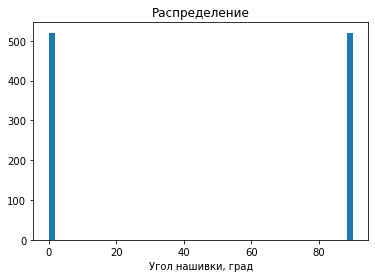

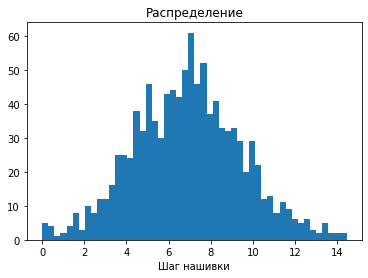

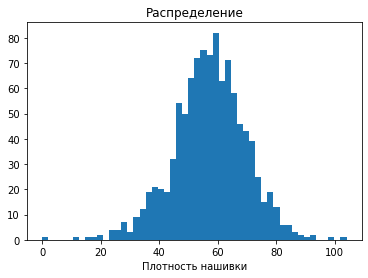

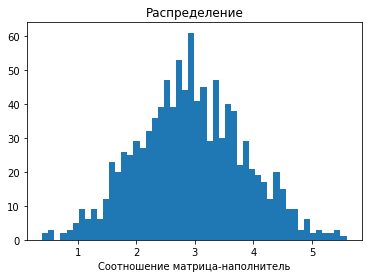

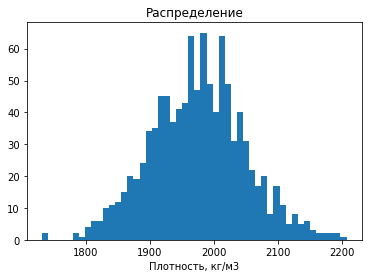

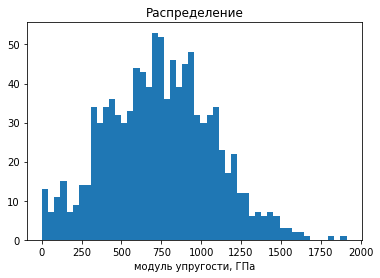

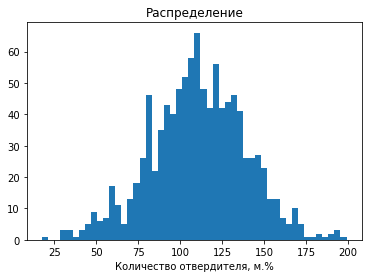

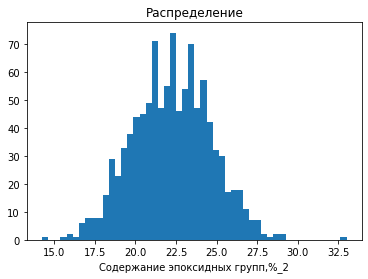

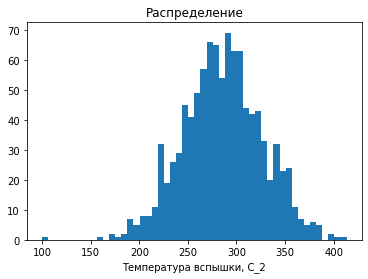

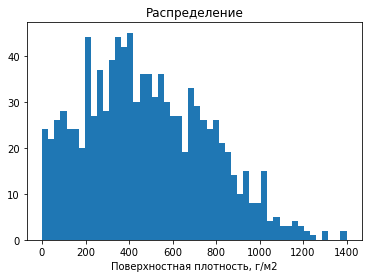

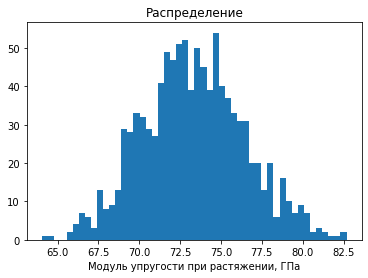

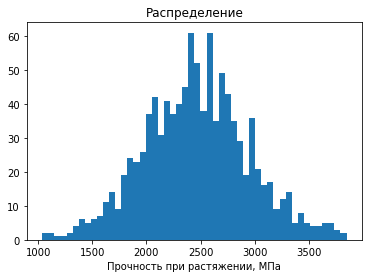

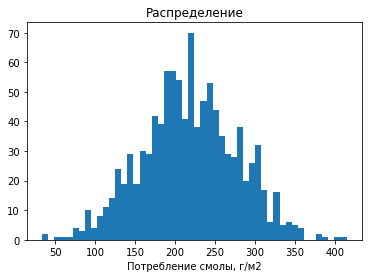

In [70]:
for col in df.columns:
    
    plt.title("Распределение")
    plt.xlabel(col)
    plt.ylabel("")
    plt.hist(df[col], bins = 50)
    plt.show()
    #построение гистограмм распределения

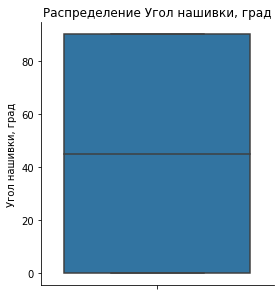

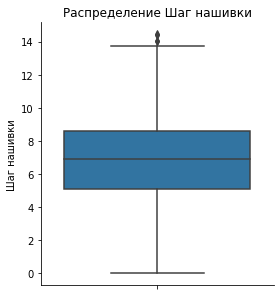

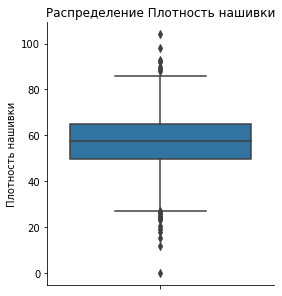

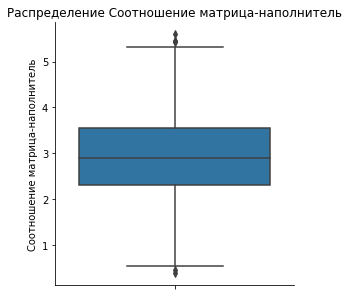

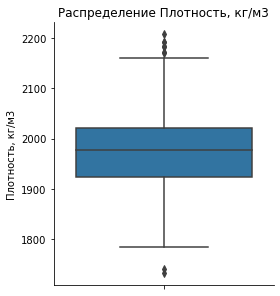

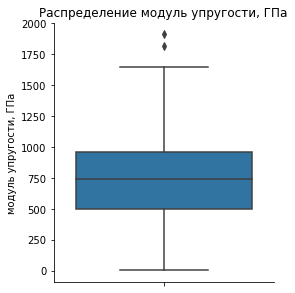

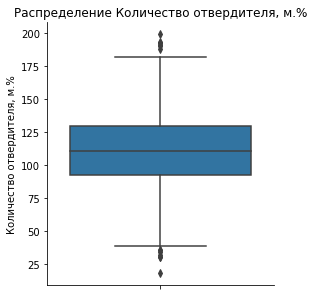

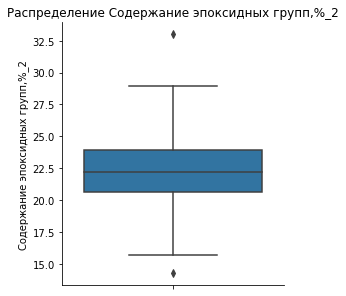

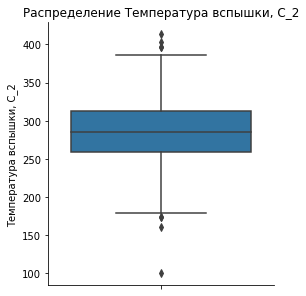

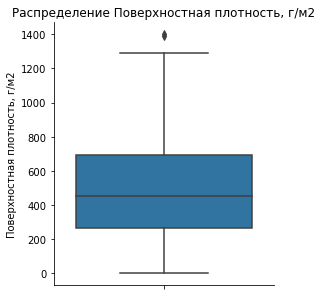

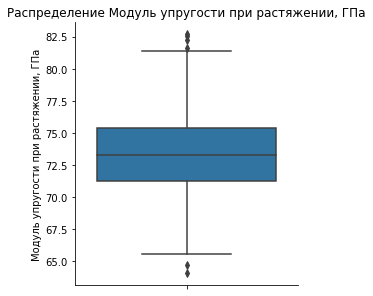

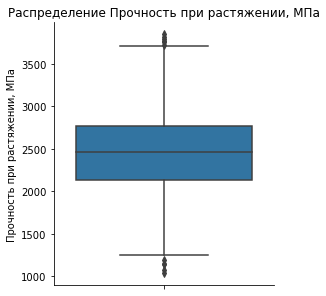

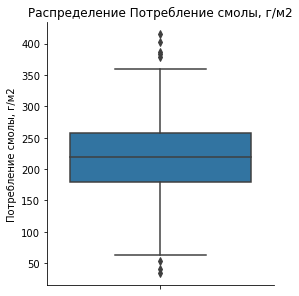

In [41]:
for col in df.columns: 
    sns.catplot(y = col, data = df, kind = 'box', height=4)
    plt.title("Распределение " + str(col))
    #построение диаграмм ящика с усами

In [12]:
df.describe().transpose()[['mean', '50%']]
# смотрим на среднее и медианное значение 

,mean,50%
"Угол нашивки, град",45.000000,45.000000
Шаг нашивки,6.911385,6.938000
Плотность нашивки,57.248399,57.413594
Соотношение матрица-наполнитель,2.930366,2.906878
"Плотность, кг/м3",1975.734888,1977.621657
"модуль упругости, ГПа",739.923233,739.664328
"Количество отвердителя, м.%",110.570769,110.564840
"Содержание эпоксидных групп,%_2",22.244390,22.230744
"Температура вспышки, С_2",285.882151,285.896812
"Поверхностная плотность, г/м2",482.731833,451.864365


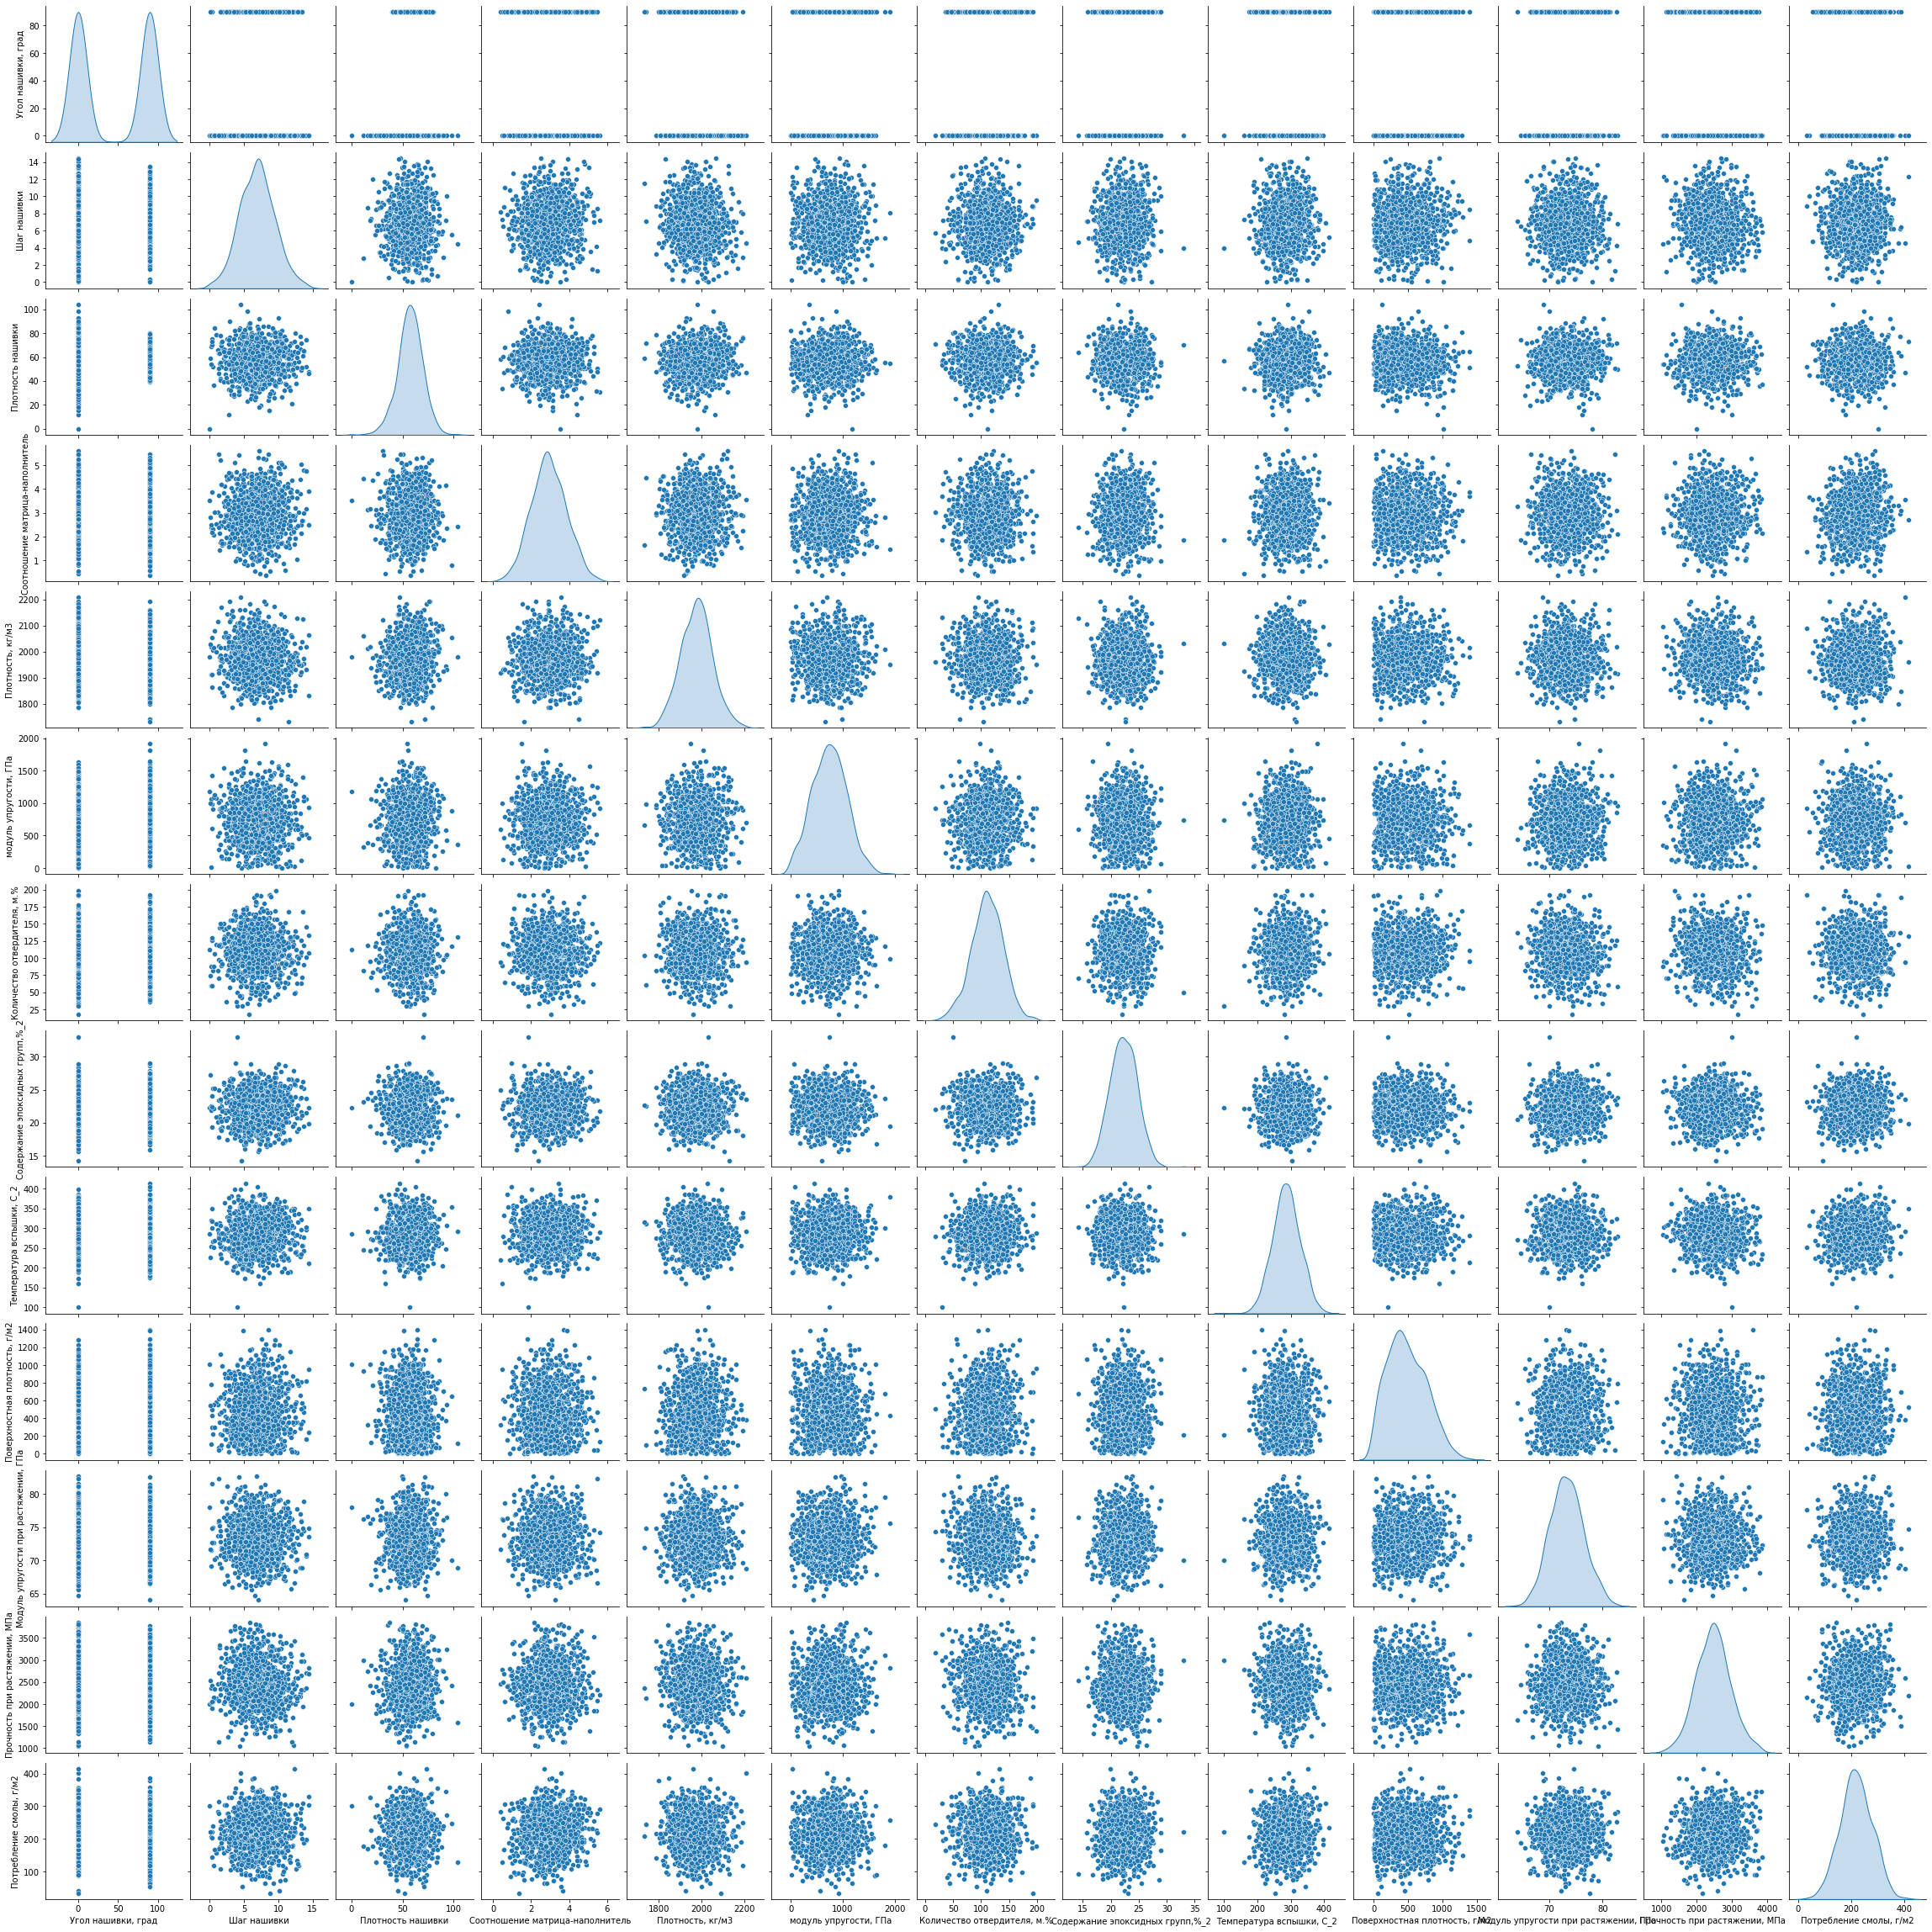

In [71]:
sns.pairplot(df[df.columns],
    diag_kind='kde');
#построение попарных графиков (kde - это построение с помощью ядер оценки плотности распределения, kde будет по диагонали)


In [72]:
corr = df.corr()

<AxesSubplot:>

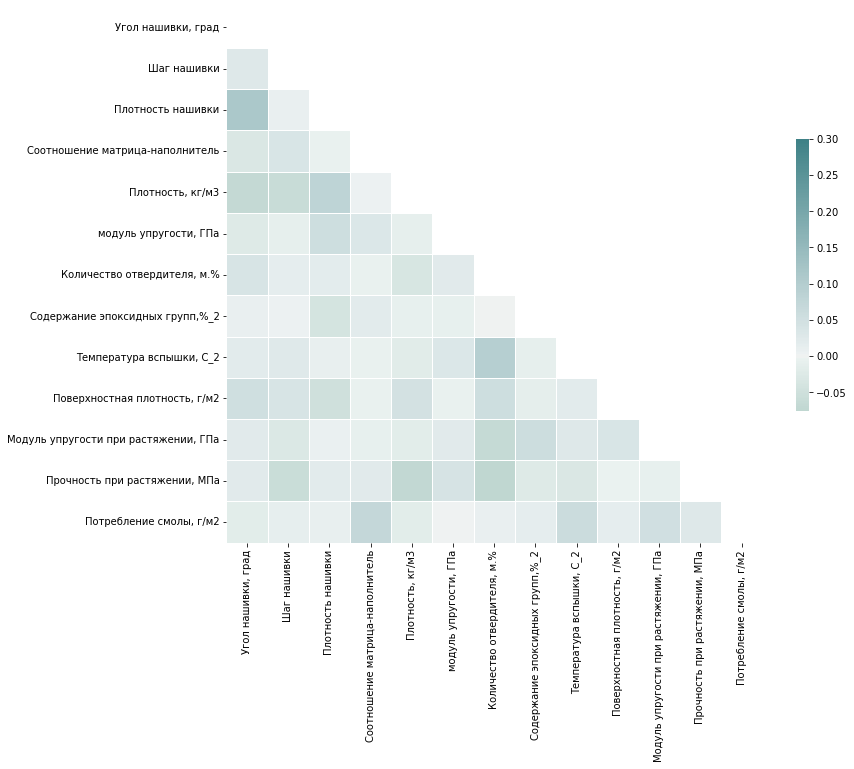

In [73]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Создаем полотно для отображения графика
f, ax = plt.subplots(figsize = (12, 10))

# Создаем цветовую политру
cmap = sns.diverging_palette(170, 200, as_cmap=True)

# Визуализируем данные кореляции
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Практическая часть


In [74]:
# сделаем копию, чтобы изменения не влияли на оригинальный dataset
df2 = copy.copy(df)
df2.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,4.0,57.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,0,4.0,60.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,0,4.0,70.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,0,5.0,47.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,0,5.0,57.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


# Предобработка данных

In [75]:
df2.isnull().sum()
#проверим какое количество выбросов по каждому столбцу

Угол нашивки, град                       0
Шаг нашивки                              0
Плотность нашивки                        0
Соотношение матрица-наполнитель         17
Плотность, кг/м3                        17
модуль упругости, ГПа                   17
Количество отвердителя, м.%             17
Содержание эпоксидных групп,%_2         17
Температура вспышки, С_2                17
Поверхностная плотность, г/м2           17
Модуль упругости при растяжении, ГПа    17
Прочность при растяжении, МПа           17
Потребление смолы, г/м2                 17
dtype: int64

In [81]:
df2 = df2.dropna()
#удаление пропусков

In [82]:
df2.isna().sum() # теперь пропусков нет

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

In [84]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df2),
    columns = df2.columns,
    index = df2.index)
norm_df
#теперь нормализуем значения

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,0.276998,0.548135,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979
1,0.0,0.276998,0.576985,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979
2,0.0,0.276998,0.673149,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979
3,0.0,0.346248,0.451971,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979
4,0.0,0.346248,0.548135,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1.0,0.628535,0.452161,0.361750,0.462855,0.476884,0.382158,0.313057,0.717503,0.149109,0.485125,0.480312,0.239516
1019,1.0,0.731664,0.516890,0.587163,0.668737,0.231678,0.707685,0.285131,0.492271,0.250230,0.475992,0.470745,0.220404
1020,1.0,0.288158,0.650355,0.555750,0.505470,0.217065,0.512067,0.517605,0.473781,0.528643,0.573346,0.578340,0.532590
1021,1.0,0.437186,0.560262,0.637396,0.703842,0.387114,0.682389,0.266309,0.561107,0.458108,0.536217,0.368070,0.428909


In [86]:
norm_df.describe()
#нормализация выполнена

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,0.491691,0.477768,0.549616,0.488427,0.512533,0.386301,0.512273,0.426215,0.593354,0.344638,0.497880,0.508634,0.484838
std,0.500175,0.177519,0.118772,0.175541,0.154890,0.172978,0.156147,0.128370,0.130695,0.201092,0.167435,0.172724,0.156875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.351790,0.478890,0.370696,0.404175,0.260652,0.412240,0.338919,0.507756,0.190296,0.386030,0.390881,0.382955
50%,0.000000,0.478940,0.551423,0.483912,0.516497,0.386165,0.512240,0.425487,0.593401,0.322574,0.494672,0.506003,0.486875
75%,1.000000,0.594597,0.624537,0.608045,0.608413,0.502528,0.618003,0.517842,0.679924,0.495105,0.606751,0.615432,0.587411
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
s_scaler = preprocessing.StandardScaler()
standart_df = pd.DataFrame(s_scaler.fit_transform(df2),
    columns = df2.columns,
    index = df2.index)
standart_df
#стандартизируем значения

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,-0.983518,-1.131530,-0.012469,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,-0.969964,-1.067720,1.098244,0.026410
1,-0.983518,-1.131530,0.230546,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,-0.969964,-1.067720,1.098244,0.026410
2,-0.983518,-1.131530,1.040595,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,-0.969964,-1.067720,1.098244,0.026410
3,-0.983518,-0.741243,-0.822518,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,-0.969964,-1.067720,1.098244,0.026410
4,-0.983518,-0.741243,-0.012469,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,-0.969964,-1.067720,1.098244,0.026410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1.016758,0.849718,-0.820917,-0.721995,-0.320884,0.523926,-0.833694,-0.881925,0.950375,-0.972814,-0.076219,-0.164054,-1.564572
1019,1.016758,1.430947,-0.275671,0.562741,1.008971,-0.894327,1.252072,-1.099577,-0.773808,-0.469707,-0.130794,-0.219473,-1.686461
1020,1.016758,-1.068634,0.848588,0.383707,-0.045622,-0.978843,-0.001319,0.712276,-0.915350,0.915476,0.450935,0.403764,0.304549
1021,1.016758,-0.228717,0.089684,0.849043,1.235730,0.004703,1.089990,-1.246274,-0.246860,0.564542,0.229077,-0.814204,-0.356695


# Разработка и обучение модели

In [91]:
# объявим словать для тестовой части 30% test_results
# получился словарь из модели и того, что нужно предсказать
test_results = {}

In [104]:
standart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   float64
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность при рас

In [105]:
X = copy.copy(standart_df)
# создаем копию
y_m = X.pop('Модуль упругости при растяжении, ГПа')
y = X.pop('Прочность при растяжении, МПа')
# удаляем из копии колонку, которую будем предсказывать

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Угол нашивки, град               1023 non-null   float64
 1   Шаг нашивки                      1023 non-null   float64
 2   Плотность нашивки                1023 non-null   float64
 3   Соотношение матрица-наполнитель  1023 non-null   float64
 4   Плотность, кг/м3                 1023 non-null   float64
 5   модуль упругости, ГПа            1023 non-null   float64
 6   Количество отвердителя, м.%      1023 non-null   float64
 7   Содержание эпоксидных групп,%_2  1023 non-null   float64
 8   Температура вспышки, С_2         1023 non-null   float64
 9   Поверхностная плотность, г/м2    1023 non-null   float64
 10  Потребление смолы, г/м2          1023 non-null   float64
dtypes: float64(11)
memory usage: 95.9 KB


In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

# Линейная регрессия

In [108]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X))
print(normalizer.mean.numpy())

[[ 0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0.]]


In [109]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=2)
])

In [110]:
linear_model.predict(X_train[:10])

array([[-0.854, -0.565],
       [-0.608, -0.169],
       [ 0.195,  1.2  ],
       [ 2.368,  0.169],
       [ 0.141, -0.815],
       [-0.197,  1.164],
       [ 1.723,  2.153],
       [-1.156,  1.047],
       [-0.146, -0.902],
       [ 0.08 , -1.693]], dtype=float32)

In [111]:
y_train[:10]

479    1.727195
341   -1.709628
743   -0.560190
685   -0.065612
919   -1.030834
823   -0.355713
755   -0.245654
584   -1.165247
307   -0.940109
865   -0.992311
Name: Прочность при растяжении, МПа, dtype: float64

In [112]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [113]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=50,
    verbose=1,
    validation_split = 0.2)

Epoch 1/50
18/18 [==============================] - 1s 11ms/step - loss: 0.8703 - val_loss: 0.9056
Epoch 2/50
18/18 [==============================] - 0s 10ms/step - loss: 0.8089 - val_loss: 0.8150
Epoch 3/50
18/18 [==============================] - 0s 8ms/step - loss: 0.7813 - val_loss: 0.8416
Epoch 4/50
18/18 [==============================] - 0s 9ms/step - loss: 0.7944 - val_loss: 0.8498
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 0.7966 - val_loss: 0.8445
Epoch 6/50
18/18 [==============================] - 0s 6ms/step - loss: 0.8026 - val_loss: 0.8874
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.7795 - val_loss: 0.8041
Epoch 8/50
18/18 [==============================] - 0s 3ms/step - loss: 0.7803 - val_loss: 0.8437
Epoch 9/50
18/18 [==============================] - 0s 4ms/step - loss: 0.7983 - val_loss: 0.8543
Epoch 10/50
18/18 [==============================] - 0s 4ms/step - loss: 0.7869 - val_loss: 0.8031
Epoch 11/50
18/18

In [114]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)

0.941592812538147

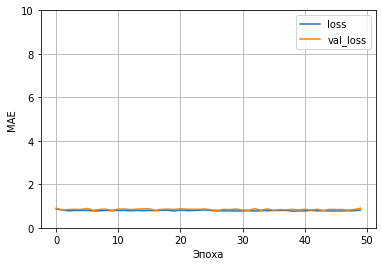

In [115]:
plot_loss(history)
linear_model.evaluate(X_test, y_test, verbose=0)

# Многослойный персептрон

In [117]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(40, activation='relu'),
      layers.Dense(40, activation='relu'),
      layers.Dense(2)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [118]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 11)               23        
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 40)                480       
                                                                 
 dense_3 (Dense)             (None, 40)                1640      
                                                                 
 dense_4 (Dense)             (None, 2)                 82        
                                                                 
Total params: 2,225
Trainable params: 2,202
Non-trainable params: 23
_________________________________________________________________


CPU times: user 3.98 s, sys: 696 ms, total: 4.67 s
Wall time: 4.33 s


0.9466024041175842

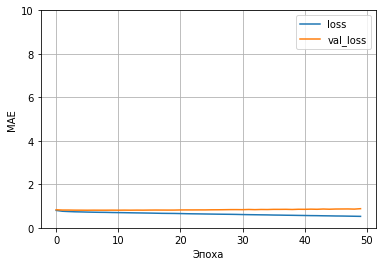

In [119]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=50)
plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)

# Измененный многослойный персептрон

In [125]:
# создаем копию
X2 = copy.copy(norm_df)
# удаляем из копии колонку, которую будем предсказывать
y_m2 = X2.pop('Модуль упругости при растяжении, ГПа')
y2 = X2.pop('Прочность при растяжении, МПа')

In [126]:
normalizer2 = tf.keras.layers.Normalization(axis=-1)
normalizer2.adapt(np.array(X2))
print(normalizer2.mean.numpy())

[[0.492 0.478 0.55  0.488 0.513 0.386 0.512 0.426 0.593 0.345 0.485]]


In [127]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.3, random_state=1)

In [123]:
def build_and_compile_model(norm):
    model2 = keras.Sequential([
      norm,
      layers.Dense(200, activation='sigmoid'),# Добавлен dropout, Активационная функция - sigmoid. Добавлен слой.
        layers.Dropout(0.6),
      layers.Dense(20, activation='sigmoid'),
      layers.Dense(10, activation='sigmoid'),
      layers.Dense(2)
    ])

    model2.compile(
        loss='mean_absolute_error',
        optimizer=tf.keras.optimizers.RMSprop(0.001),# Оптимайзер - RMSprop.
        #metrics=['accuracy']
        #metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
    )
    return model2

dnn_model2 = build_and_compile_model(normalizer2)
dnn_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 11)               23        
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 200)               2400      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 20)                4020      
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 2)                 22        
                                                      

Epoch 1/50
16/16 [==============================] - 0s 13ms/step - loss: 0.1271 - val_loss: 0.1367
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 0.1275 - val_loss: 0.1390
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.1276 - val_loss: 0.1362
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1265 - val_loss: 0.1367
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.1263 - val_loss: 0.1381
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.1276 - val_loss: 0.1362
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1263 - val_loss: 0.1365
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 0.1273 - val_loss: 0.1368
Epoch 9/50
16/16 [==============================] - 0s 8ms/step - loss: 0.1272 - val_loss: 0.1374
Epoch 10/50
16/16 [==============================] - 0s 11ms/step - loss: 0.1263 - val_loss: 0.1427
Epoch 11/50
16/16

0.15041205286979675

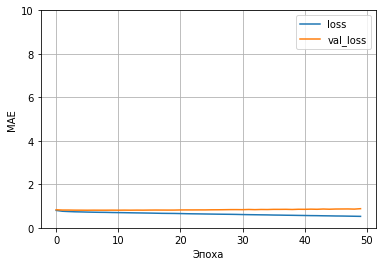

In [129]:
%%time
history2 = dnn_model2.fit(
    X_train2,
    y_train2,
    validation_split = 0.3,
    verbose=1, epochs=50)
plot_loss(history)
dnn_model2.evaluate(X_test2, y_test2, verbose=0)

Epoch 1/70
21/21 [==============================] - 0s 12ms/step - loss: 0.1316 - val_loss: 0.1380
Epoch 2/70
21/21 [==============================] - 0s 6ms/step - loss: 0.1304 - val_loss: 0.1317
Epoch 3/70
21/21 [==============================] - 0s 7ms/step - loss: 0.1310 - val_loss: 0.1316
Epoch 4/70
21/21 [==============================] - 0s 5ms/step - loss: 0.1310 - val_loss: 0.1333
Epoch 5/70
21/21 [==============================] - 0s 7ms/step - loss: 0.1303 - val_loss: 0.1322
Epoch 6/70
21/21 [==============================] - 0s 5ms/step - loss: 0.1301 - val_loss: 0.1319
Epoch 7/70
21/21 [==============================] - 0s 7ms/step - loss: 0.1309 - val_loss: 0.1327
Epoch 8/70
21/21 [==============================] - 0s 7ms/step - loss: 0.1312 - val_loss: 0.1331
Epoch 9/70
21/21 [==============================] - 0s 5ms/step - loss: 0.1307 - val_loss: 0.1354
Epoch 10/70
21/21 [==============================] - 0s 9ms/step - loss: 0.1303 - val_loss: 0.1318
Epoch 11/70
21/21 

0.15084879100322723

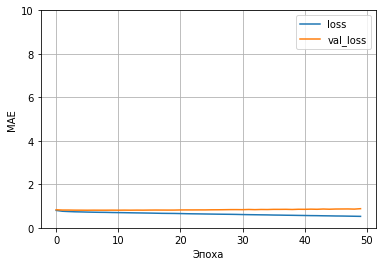

In [128]:
%%time
history2 = dnn_model2.fit(
    X_train2,
    y_train2,
    validation_split = 0.1,#изменили на 0.1
    verbose=1, epochs=70)#добавили 20 эпох
plot_loss(history)
dnn_model2.evaluate(X_test2, y_test2, verbose=0)

In [130]:
# создаем словарь параметров
param_grid = {
    'optimizer': ['RMSprop', 'Adam', 'Adamax', 'Adagrad'],
    'activation': ['sigmoid', 'relu', 'leaky_relu']
    }

# Тестирование модели

In [131]:
test_results ['linear_model'] = linear_model.evaluate(X_test, y_test, verbose=0)
test_results ['dnn_model'] = dnn_model.evaluate(X_test, y_test, verbose=0)
test_results ['dnn_model2'] = dnn_model2.evaluate(X_test2, y_test2, verbose=0)

In [135]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

,Mean absolute error
linear_model,0.941593
dnn_model,0.946602
dnn_model2,0.150412
